# Data Science Project: Credit Card Fraud prediction


**Name:** Shilpa Gopalakrishna


# Table of contents
1. [Aims, objectives and plan](#section1)<br>
    a. [Aims and objectives](#section1.a)<br>
    b. [Plan](#section1.b)
2. [Understanding the case study](#section2)
3. [Pre-processing applied](#section3)<br>
    a. [Preparing the labels appropriately](#section3.a)<br>
    b. [Removing synonymous and noisy attributes](#section3.b)<br>
    c. [Dealing with missing values](#section3.c)<br>
    d. [Rescaling if necessary](#section3.d)<br>
    e. [Other](#section3.e)
4. [Technique 1 ](#section4)<br>
    a. [Discuss your motivation and provide a schematic figure of the process](#section4.a)<br>
    b. [Setting hyper parameters with rationale](#section4.b)<br>
    c. [Optimising hyper parameters](#section4.c)<br>
    d. [Performance metrics for training](#section4.d)<br>
5. [Technique 2](#section5)<br>
    a. [Discuss your motivation and provide a schematic figure of the process](#section5.a)<br>
    b. [Setting hyper parameters with rationale](#section5.b)<br>
    c. [Optimising hyper parameters](#section5.c)<br>
    d. [Performance metrics for training](#section5.d)<br>
6. [Comparison of metrics performance for testing](#section6)<br>
    a. [Use of cross validation for both techniques to deal with over-fitting](#section6.a)<br>
    b. [Comparison with appropriate metrics for testing](#section6.b)<br>
    c. [Model selection (ROC or other charts)](#section6.c)<br>
7. [Final recommendation of best model](#section7)<br>
    a. [Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency](#section7.a)<br>
    b. [Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective](#section7.b)<br>
8. [Conclusion](#section8)<br>
    a. [What has been successfully accomplished and what has not been successful?](#section8.a)<br>
    b. [Reflecting back on the analysis, what could you have done differently if you were to do the project again?](#section8.b)<br>
    c. [Provide a wish list of future work that you would like to do](#section8.c)

## Case study

Refer to the brief

## 1. Aims, objectives and plan (4 marks)<a class="anchor" id="section1"></a>

### a) Aims and objectives<a class="anchor" id="section1.a"></a>
Although we have already stated what is required, please formally state the aims and objectives of the project in your own words.
(100-200 words)

**Explanation: Aims & Objective**

The main objective of the task is to categorise/classify a credit card transaction as Fraud (Class as 1) or non-fraud (Class as 0) fraud. A classification or clustering model must be created using Credit card fraud dataset. Allowed library is only scikit-learn. As the dataset is imbalanced, pre-processing must be applied to handle imbalance in data & apply modelling and evaluation. 

The dataset provided includes 31 features and approx 2.75 lakhs records & 29 features are Principal component convereted as the bank data is confidential.

As part of evaluation, the model should detect fraud or non-fraud and should be within the below allowed budget of wrong predictions. 

1.	**Allowed FalsePositive** is £20k for each £100m of actual Non-Fraudulent transactions (True Negative), costs bank 1K per FalsePositive.
2.	**Allowed FalseNegative** is £50k for each £200k of actual Fraudulent transactions (True Positive), costs bank 10K per FalseNegative.


###  b) Plan<a class="anchor" id="section1.b"></a>
Please demonstrate how you have conducted the project with a simple Gantt chart.

**Explanation**
Below are the phases of course work execution:
1. **Business understanding** – Read & understood the business requirement document and prepared an execution plan.
2. **Data Understanding & Exploratory data analysis (EDA)** of the dataset – Data explorations like data types, correlation, feature analysis & relevance, distribution, Null analysis, Class imbalance.
3. **Data cleaning** – Extended the EDA with data cleaning tasks like removing features are relevant for classification, feature scaling, handling imbalance in dataset.
4. **Modelling** – Analyse and finalise the techniques, execute the algorithms, shortlist 2 algorithms with good training results, handle overfitting, evaluate the model on train set. I used 2 classification techniques i.e. Random Forest & Multi layer perceptron algorithms. 
5. **Evaluation & best model selection** – Evaluate the model on test set & choose the final model.
6. **Report writing** – Document the techniques, results, limitations, future score & conclusion.


## 2. Understanding the case study (4 marks)<a class="anchor" id="section2"></a>

###  Case study analysis
State the key points that you found in the case and how you intend to deal with them appropriately to address the bank's needs. (You can include more than four points.) (200-300 words)

**Explanation:**

1. **"Time" feature** – The features provided are after dimension reduction, so assuming that top important features are provided, we retain all Principal components. Time feature denotes the elapsed time between the current and first transaction, which is considered in temporal-based models. As in the coursework, I have only considered classification techniques, “Time” field is not considered in the modelling. Hence, this field is dropped from the feature set. 
<br>

2.	**Imbalanced dataset** – The percentage of Class “Non fraud” is 99.82% & “fraud” is 0.17%. This is a highly imbalanced dataset. 
    - We must either upsample or downsample data to balance the classes. I have used random sampling technique where I have chosen a sub sample of train set for modelling. 
    - As the dataset is huge, for modelling, 10K random samples are used from the trainset (All fraud samples are included & 10K non fraud samples). Test set is not included in random sampling to avoid data leakage in training.
    - Random Forest provides a hyper parameter called 'class_weight'='balanced' that selects the random samples that are class balanced.
<br>


3. **Overfitting** – As the dataset is imbalanced, we are using Random Forests “class weight” attribute as “balance”. Hence, the decision trees built are from balanced random sample. So, scoring “f1” is used which scores the model based on balance between recall & precision i.e. balance between False Positive & False Negative.  Cross validation technique overcomes the problem of overfitting by training the model many times with different hyperparameters & finds the model that scores more over ‘k’ folds. As our dataset is from a random sampling, a particular random sample might be good at predicting just due to chance. Cross validations, avoids such “lucky” data sampling issues by evaluating the model many times with random samples.
<br>

4. **Allowed budget for misclassification vs Importance of evaluation with respect to recall and precision** – 
    - As the dataset is highly imbalanced, for evaluating model, we should not consider “Accuracy” as the metric, rather should consider Precision/Recall as the metric. Accuracy of the model always results around 99% because most of the Non-Fraud cases are classified correctly. Precision is the proportion of positive identifications was actually correct and recall is the proportion of actual positives was identified correctly. Improving precision typically reduces recall and vice versa. Hence a balanced metric of F1 score is used for model evaluation as the dataset is imbalanced.
    - *More importance is given to reduce FalseNegative because the cost of missing to classify an actual Fraud as Non-fraud is more than the FalsePositive.*




## 3. Pre-processing applied (20 marks)<a class="anchor" id="section3"></a>
Enter the code in the cells below to execute each of the stated sub-tasks. 


In [1]:
#Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

from sklearn.utils import resample

from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,  average_precision_score,plot_roc_curve,auc
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix, matthews_corrcoef,f1_score

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold,StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import normalize

from joblib import dump, load
import time

### Basic Exploratory Data Analysis

In [167]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

###  a) Preparing the labels appropriately<a class="anchor" id="section3.a"></a>

Import dataset & split the dataset into Train & Test set.

In [2]:
df = pd.read_csv("credit.csv")
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=444)
#type(X_train),type(y_train), y_train.shape, y .shape, type(y)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 (213605,),
 (284807,),
 pandas.core.series.Series)

###  b) Removing synonymous and noisy attributes<a class="anchor" id="section3.b"></a>


**Remove synonymous attributes**   
- Features V1 to V29 are PCA’s principal components. Hence, in order not to lose any variance explained by Principal components, we do not remove any attributes. Also, we do not know the actual features, so without the domain information, we rather not drop any features & hence retain all Principal components.
- Code to find any correlation among the features by plotting correlation plot. There are no synonymous attributes in the dataset. So, no attribute to drop.

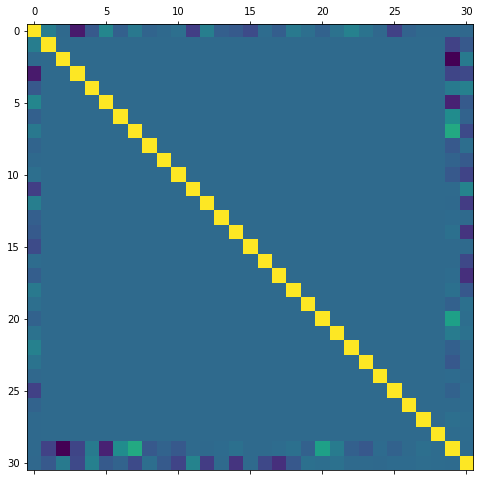

In [3]:
corr = df.corr() 

# Plot heatmap of correlation
f = plt.figure(figsize=(8, 8))
plt.matshow(df.corr(),fignum=f.number)
plt.show()

**Drop noisy attribute**  

There are no noisy attribute. But, due to below reasons, "Time" feature has been dropped.

 - The "time" feature is evenly distributed over a 24 hour day, so it does not contribute in classifying fraud or non-fraud.  The distribution of time and amount in the draset can be visualized as below.

 - However, the feature time is not in absolute unit, it is in relative unit i.e., time elapsed between 2 transactions. The relative time unit does not give any quantitative information for modelling. This feature is mainly important for time series analyses if we had considered temporal modelling technique. As I have not considered temporal technique in the coursework, the “Time” feature is dropped from our modelling technique which is “Classification”

C:\Users\shilp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shilp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


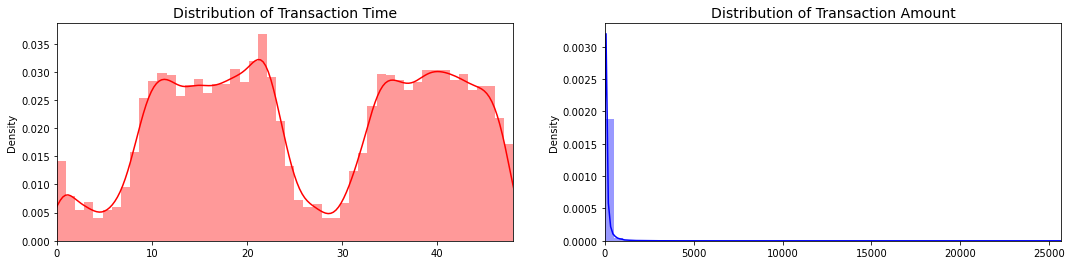

In [4]:
#Plot the distribution of time and amount

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'Time' feature 
sns.distplot(df['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])

sns.distplot(df['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

**Drop the attribute "Time"**

In [5]:
X = X.drop(['Time'],axis = 1,inplace=False)
X_train = X_train.drop(['Time'],axis = 1,inplace=False)
X_test = X_test.drop(['Time'],axis = 1,inplace=False)

###  c) Dealing with missing values<a class="anchor" id="section3.c"></a>


- No missing valuess in the dataset as the dataset is already Principal Component Analysis (PCA) converted. 
- As the bank data is confidential, applying PCA masks the original data, and the provided PCA components explain the maximum variance in the original dataset. Missing values are handled before converting the dataset to PCA components.
- The dataset we have now is already pre-processed and does not have any missing values. This can be verified through below code.

In [6]:
df.isnull().values.any()

False

Check for duplicate rows, No duplicates found.

In [173]:
list_duplicate_rows = []
for i, ref in enumerate(df.columns[:-1]):
    for other in df.columns[i + 1:-1]:
        if other not in list_duplicate_rows and np.all(df[ref] == df[other]):
            list_duplicate_rows.append(other)    
len(list_duplicate_rows)

0

###  d) Rescaling if necessary<a class="anchor" id="section3.d"></a>


- The first technique that I have selected in **Random Forest** algorithm which is a tree-based model and hence does not require feature scaling. The train data is partitioned into branches based on the hyperparameter configuration. Even if the normalization is applied, the decision tree would still produce the same result.    
<br>

- 2nd technique that I have used for classification is **Multilayer Perceptron** i.e. MLPClassifier. This is a neural network inspired technique that works on minimizing the loss function though gradient based optimization technique. This technique needs the features to be scaled (for faster convergence) and hence I have used MinMaxScalar for Multilayer perceptron algorithm.    
<br>

- As the data scaling does not influence the Random Forest model & results, to maintain single dataframe for both techniques, I am using scaled data even for both the techniques.  


Below code is to retain an original copy of the dataframe which is used for calculation of cost incured based of FalsePositive & FalseNegative results. This is required for final model evaluation on test set.

In [7]:
df_original_xtest = X_test.copy(deep=True)
df_original_ytest = y_test.copy(deep=True)
df_original_xtrain = X_train.copy(deep=True)
df_original_ytrain = y_train.copy(deep=True)

Apply Min max scaling - First fit the train set only & then transform the test set with the scalar object.

In [8]:
scaler = MinMaxScaler()

scaler=scaler.fit(X_train[['V1' ,'V2', 'V3' ,'V4' ,'V5', 'V6' ,'V7', 'V8' ,'V9', 'V10' ,'V11' ,'V12', 'V13', 'V14' ,'V15', 'V16' ,'V17' ,'V18' ,'V19' ,'V20' ,'V21' ,'V22', 'V23' ,'V24', 'V25'
, 'V26', 'V27' ,'V28', 'Amount']]) 

X_train[['V1' ,'V2', 'V3' ,'V4' ,'V5', 'V6' ,'V7', 'V8' ,'V9', 'V10' ,'V11' ,'V12', 'V13', 'V14' ,'V15', 'V16' ,'V17' ,'V18' ,'V19' ,'V20' ,'V21' ,'V22', 'V23' ,'V24', 'V25'
, 'V26', 'V27' ,'V28', 'Amount']] = scaler.transform(X_train[['V1' ,'V2', 'V3' ,'V4' ,'V5', 'V6' ,'V7', 'V8' ,'V9', 'V10' ,'V11' ,'V12', 'V13', 'V14' ,'V15', 'V16' ,'V17' ,'V18' ,'V19' ,'V20' ,'V21' ,'V22', 'V23' ,'V24', 'V25'
, 'V26', 'V27' ,'V28', 'Amount']])

X_test[['V1' ,'V2', 'V3' ,'V4' ,'V5', 'V6' ,'V7', 'V8' ,'V9', 'V10' ,'V11' ,'V12', 'V13', 'V14' ,'V15', 'V16' ,'V17' ,'V18' ,'V19' ,'V20' ,'V21' ,'V22', 'V23' ,'V24', 'V25'
, 'V26', 'V27' ,'V28', 'Amount']]  = scaler.transform(X_test[['V1' ,'V2', 'V3' ,'V4' ,'V5', 'V6' ,'V7', 'V8' ,'V9', 'V10' ,'V11' ,'V12', 'V13', 'V14' ,'V15', 'V16' ,'V17' ,'V18' ,'V19' ,'V20' ,'V21' ,'V22', 'V23' ,'V24', 'V25'
, 'V26', 'V27' ,'V28', 'Amount']])

### e) Other<a class="anchor" id="section3.e"></a>

1. EDA1 - EDA on Class imbalance

Non Fraud Count -  284315
Fraud Count -  492
----------------------------------------
Ratio of Non Fraud and Fraud
----------------------------------------
0    0.998273
1    0.001727
Name: Class, dtype: float64


<AxesSubplot:title={'center':'Class vs Count'}, xlabel='Class', ylabel='Count'>

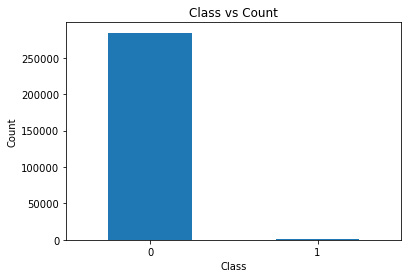

In [64]:
#Visulaize Fraud to Non Fraud Ratio

df_nonfraud = df[df.Class == 0] 
df_fraud = df[df.Class == 1] 
print("Non Fraud Count - ",len(df_nonfraud))
print("Fraud Count - ",len(df_fraud))
print("-"*40)
# Count the occurrences of fraud and non fraud cases
fnf = df["Class"].value_counts()
print("Ratio of Non Fraud and Fraud")
print("-"*40)
print(fnf/len(df))

# Plottingg your data
plt.xlabel("Class")
plt.ylabel("Count")
fnf.plot(kind = 'bar',title = 'Class vs Count',rot=0)

2. EDA2 - Visualize how first 2 Principal components are scattered

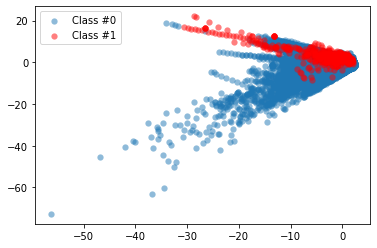

In [9]:
# Plot how fraud and non-fraud cases are scattered over first 2 principal components - V1 & V2
plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.legend()
plt.show()

### **Data pre-processing**

**Handle Class imbalance:**

- As the dataset is large, I did not choose to up-sample the minority class in the train data. The down-sampling majority class did not provide satisfactory results on test set. Hence, I used a different technique where I choose random subsample from the train set of size 20K of all Non frauds & I included all the Fraud records in the train set to the subsample set. Hence, the subsample that I use for model training has 20K (Non fraud class) + 371 (Fraud class) = 20371 records. 
<br>

- I have used Random Forest & Multi-layer perceptron. 
<br>

- Random Forest algorithm in Scikit-learn provides a hyper parameter called “Class weight” that takes either a proportion of class weights for each class, or a keyword parameter called “balanced” or “balance-subsample”. Along with the random subsampling, I also choose the “Class weight” as “balance-subsample” which makes sure that each tree is built considering equal samples of the Fraud & Non-Fraud classes. This technique also makes the nested cross validation process quicker than considering the up-sampled data. 
<br>

- I compared subsampled Class weight technique with SMOTE up-sampling approach & found that both the technique provides similar requests on evaluation on Train & test set. Hence, I choose subsampled Class weight technique for Random Forest & subsample technique for Multi-layer perceptron.


In [10]:
#Set df2 equal to all of the Fraud and 20,000 Non-Fraud transactions from the train set.

df1 = pd.concat([X_train, y_train], axis=1)
df2 = df1[df1.Class == 1]
df2 = pd.concat([df2, df1[df1.Class == 0].sample(n = 20000)], axis = 0)

# Below are the subsampled dataframes that will be used for model training

X_subsample_train = df2.drop('Class', axis=1)
y_subsample_train = df2['Class']

In [11]:
# Check the class proportions

fraud = df2[df2['Class'] == 0]
non_fraud = df2[df2['Class'] == 1]
df2.shape,len(fraud),len(non_fraud)

((20371, 30), 20000, 371)

### **Utility function used to print model evaluation results:**

In [326]:
# Function to print model score, Classification Report & confusion matrix 
def print_model_metrics(mdl, X, y, title):
    p=mdl.predict(X)
    target_names = ['Non-Fraud', 'Fraud']
    print("Model score accuracy--", mdl.score(X, y))
    print("Balanced accuracy--",metrics.balanced_accuracy_score(y,p))
    print("Precision--",metrics.precision_score(y,p))
    print("roc_auc_score--",roc_auc_score(y, p))
    print("Recall_score--",metrics.recall_score(y, p))
    print("f1-",f1_score(y, p))    
    print(classification_report(y,p,target_names=target_names))
    print(confusion_matrix(y,p))
    disp = plot_confusion_matrix(mdl, X, y,display_labels=target_names)
    disp.ax_.set_title(title)

# Function to plot ROC curve & Precision-Recall curve
def print_model_curve(mdl, X, y, mdlname):
    print("Plot for ",mdlname)
    #plot_roc_curve(mdl, X, y)
    p=mdl.predict(X)
    fpr, tpr, _ = roc_curve(y, p)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC AUC = ' + str(round(roc_auc, 2)))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--')
    disp = plot_precision_recall_curve(mdl, X, y)
    
# Function to plot only Confusion Matrix    
def print_cm(mdl, X, y):
    p=mdl.predict(X)
    print(confusion_matrix(y,p))
    
# Function to plot ROC Curve for 2 models in same plot for comparision  
def multiple_rocauc_curve(mdl_rf, mdl_mlp, X, y): 
    p1=mdl_rf.predict(X)
    p2=mdl_mlp.predict(X)
    fpr1, tpr1, _ = roc_curve(y, p1)
    fpr2, tpr2, _ = roc_curve(y, p2)
    roc_auc1 = auc(fpr1, tpr1)
    roc_auc2 = auc(fpr2, tpr2)
    plt.plot(fpr1, tpr1, label='RF auc = ' + str(round(roc_auc1, 2)))
    plt.plot(fpr2, tpr2, label='MLP auc = ' + str(round(roc_auc2, 2)))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--')
    
# Function to plot PR Curve for 2 models in same plot for comparision     
def multiple_pr_curve(mdl_rf, mdl_mlp, X, y): 
    plot_precision_recall_curve(rf_mdl_final1, X_test.values,y_test, ax = plt.gca(),name = "RF")
    plot_precision_recall_curve(mlp_mdl_final1, X_test.values,y_test, ax = plt.gca(),name = "MLP")
    
# Function to plot ROC Curve for 2 models in same plot for comparision - Train sets 
def multiple_rocauc_curve_subsample_train(mdl, X_subsample_train, y_subsample_train, X_train, y_train, mdlname): 
    p1=mdl.predict(X_subsample_train)
    p2=mdl.predict(X_train)
    fpr1, tpr1, _ = roc_curve(y_subsample_train, p1)
    fpr2, tpr2, _ = roc_curve(y_train, p2)
    roc_auc1 = auc(fpr1, tpr1)
    roc_auc2 = auc(fpr2, tpr2)
    plt.plot(fpr1, tpr1, label=mdlname+' Subsample Train auc = ' + str(round(roc_auc1, 2)))
    plt.plot(fpr2, tpr2, label=mdlname+' Full Train auc = ' + str(round(roc_auc2, 2)))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--')
    
# Function to plot PR Curve for 2 models in same plot for comparision   - Train sets    
def multiple_pr_curve_subsample_train(mdl, X_subsample_train, y_subsample_train, X_train, y_train, mdlname): 
    plot_precision_recall_curve(mdl, X_subsample_train.values,y_subsample_train, ax = plt.gca(),name =mdlname+ " Subsample Train")
    plot_precision_recall_curve(mdl, X_train.values,y_train, ax = plt.gca(),name = mdlname+ " Full Train")
    
# Function to plot bar plot for comparision of 2 model scores
def compare_metrics(mdl_rf, mdl_mlp, X, y): 
    p1=mdl_rf.predict(X)
    p2=mdl_mlp.predict(X)

    rf_acc=metrics.balanced_accuracy_score(y,p1);rf_acc=float("{:.2f}".format(rf_acc))
    rf_pre=metrics.precision_score(y,p1);rf_pre=float("{:.2f}".format(rf_pre))
    rf_recall=metrics.recall_score(y, p1);rf_recall=float("{:.2f}".format(rf_recall))
    rf_f1=f1_score(y, p1);rf_f1=float("{:.2f}".format(rf_f1))
    rf_auc = roc_auc_score(y, p1);rf_auc=float("{:.2f}".format(rf_auc))
    #val=plot_precision_recall_curve(rf_mdl_final1,X_test, y_test, ax = plt.gca(),name ="Test")
    #rf_pr = val.average_precision
    rf_pr = 0.87
    
    mlp_acc=metrics.balanced_accuracy_score(y,p2);mlp_acc=float("{:.2f}".format(mlp_acc))
    mlp_pre=metrics.precision_score(y,p2);mlp_pre=float("{:.2f}".format(mlp_pre))
    mlp_recall=metrics.recall_score(y, p2);mlp_recall=float("{:.2f}".format(mlp_recall))
    mlp_f1=f1_score(y, p2);mlp_f1=float("{:.2f}".format(mlp_f1))
    mlp_auc = roc_auc_score(y, p2);mlp_auc=float("{:.2f}".format(mlp_auc))
    mlp_pr = metrics.average_precision_score(y,p2);mlp_pr=float("{:.2f}".format(mlp_pr)) #0.78
    #val=plot_precision_recall_curve(mdl_mlp, X.values,y, ax = plt.gca(),name ="Test")
    mlp_pr = 0.78 #val.average_precision
    
    lst_rf_metrics = [rf_f1,rf_recall,rf_pre,rf_auc,rf_pr,rf_acc]
    lst_mlp_metrics = [mlp_f1,mlp_recall,mlp_pre,mlp_auc,mlp_pr,mlp_acc]
  
    index = ['f1-score','Recall','Precision','AUC' ,'PR' ,'Balanced Accuracy']
    df_compare = pd.DataFrame({'Random_Forest': lst_rf_metrics, 'MLP': lst_mlp_metrics}, index=index)
    ax = df_compare.plot.bar(rot=4,color={"Random_Forest": "lightgreen", "MLP": "lightblue",},figsize=(8,5),xlabel="Metrics",ylabel="Score")
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.045), fontsize=9)

## 4. Technique 1 (20 marks)<a class="anchor" id="section4"></a>

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process<a class="anchor" id="section4.a"></a>

100-200 words

**Explanation**
<br>

**Chosen technique:** 
- Sklearn’s Random Forest Classifier 
<br>

**Motivation for choosing Random Forest Classifier:**
- I tried couple of classification algorithms like Random Forest, Logistic regression, SVM, KNN, Clustering algorithm like K-means & Isolation Forest. Of all the algorithm, the ensemble method which is Random Forest that employs bagging mechanism performed comparatively better than the others. 
- Random forest belongs to a category of ensemble methods & is works differently than other classification algorithms. It combines the predictions of several base estimators built with a given learning algorithm to improve generalizability and robustness over a single estimator.
- Random Forest is an averaging ensemble method where multiple decision trees are built independently, and their predictions are averaged. The sampling technique is called boosting. The combined estimator performs usually better than any of the single base estimator because its variance is reduced.
<br>

**Working:**
- Random forest builds multiple decision trees (number of trees provided as hyperparameter) using randomly and independently(bagging) selected data from the trainset. The features also chosen at random for building each tree. So, each decision tree is trained on different dataset and different features. The prediction of the ensemble is given as the averaged prediction of the individual classifiers. 
- When building individual decision trees, the features are branched out. To decide which of the possible splits are better, the information gain is calculated, and we choose the one that has the highest information gain. The Information Gain of a split refers to how much information is gained by choosing one of the possible splits. The Gini impurity describes how pure or mixed the data labels in a node. The purer the data the closer Gini is to 0. Information gain is given by:
               𝐼𝑛𝑓𝑜𝑟𝑚𝑎𝑡𝑖𝑜𝑛 𝐺𝑎𝑖𝑛 = 𝐼𝑚𝑝𝑢𝑟𝑖𝑡𝑦 𝑜𝑓 𝑝𝑎𝑟𝑒𝑛𝑡 – 𝑤𝑒𝑖𝑔ℎ𝑡𝑒𝑑 𝑎𝑣𝑒𝑟𝑎𝑔𝑒 𝑖𝑚𝑝𝑢𝑟𝑖𝑡𝑦 𝑜𝑓 𝑐ℎ𝑖𝑙𝑑𝑟𝑒𝑛
- Entropy or the misclassification error is another impurity measures alternative to Gini impurity.
- Decision tree is built by maximizing Information gain and minimizing Gini impurity or Entropy.

**Random Forest Model building lifecycle**


Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale<a class="anchor" id="section4.b"></a>

**Explanation on Random Forest's hyper parameters:**

Below are the hyperparameters available for RandomForest and the rationale for choosing them.
Rationale for choosing the hyper parameter.
<br>

- n_estimators is kept to default value of 100 trees in a forest. Increasing trees decreases variance & improves accuracy but is computationally expensive. Hence retained 100.
- Max depth – is the depth of the tree, used to prune the tree. Increasing depth increases accuracy, but it also overfits. Hence, defining an optimal depth is required.
- Min_samples_split – if there are no samples defined as much as min_sample_split, then the split is not attempted.
- Max_features – not all features are considered in each decision tree. Max features allows to configure number of features to be considered in each tree.
- min_samples_leaf – this is configured to prune the tree. Tree can get complex with depth and hence, early stopping based on min_sample_leaf configured.
- Criterion is the measure of impurity and is chosen as gini.
- Class_weight – For imbalanced data sets, class weights can be defined for each class. In Credit card fraud classification scenario, as the dataset is highly imbalanced, the “balanced” value is used where values of class is automatically adjusted with weights inversely proportional to class frequencies in the input data. 
- bootstrap=true is the default hyper parameter which is not modified because we want each decision tree to be randomly sampled from the provided train set.


In [15]:
#default params
# n_estimators=100  - number of trees in the forest
# bootstrap=true    - Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree
# max_depth         - Maximum depth of the tree. If None, then nodes are expanded til all leaves are pure or < min_samples_split samples
# min_samples_split- Minimum number of samples required to split an internal node
# max_features      -  Number of features to consider when looking for the best split, max_features=sqrt(n_features) or log2(n_features)
# min_samples_leaf  - Minimum number of samples required to be at a leaf node.
rf_grid_params = {
    "max_depth"          : [40,60],  
    "min_samples_split"  : [2, 10,20,30], 
    "max_features"       : [ "sqrt","log2"],
    'min_samples_leaf'   : [1,10,30],
    'class_weight': ['balanced_subsample'],
    'warm_start': [True]
}

### c) Optimising hyper parameters<a class="anchor" id="section4.c"></a>



- **Grid search** (GridSearchCV) is a technique used for optimal Hyper parameter selection. GridSearchCV exhaustively generates various candidates from a grid of parameter values specified in “param_grid” parameter and the default folds of cross validation is 5 times.
- All the possible combinations of parameter values are evaluated and the best combination is selected that match the scoring metric provided in GridSearchCV .
- The best parameter from the GridSearch can be known through the attribute grid_mdl.best_params_  
- Due to longer time for computation to build many decision trees, Grid search parameters for RF algorithm is limited to few combinations only after trying out individually. In each of the 5-fold, 48 combinations are fitted (so total 5 * 48 = 240 iterations), which is displayed when the model starts executing if verbose=3
             Fitting 5 folds for each of 48 candidates, totalling 240 fits
- With a default cross validation, the optimal hyper parameters chosen are below:


| Hyperparameter | BestValue | Description |
| :- | -: | :-: |
| n_estimators(default) | 100 | Number of trees in the forest
| max_depth | 60 | Maximum depth of the tree
| min_samples_split | 30 | Minimum number of samples required to split an internal node
| max_features | log2 | Number of features to consider when looking for the best split
| min_samples_leaf | 1 | Minimum number of samples required to be at a leaf node. 
| Criterion(default) | Gini | Function to measure the quality of a split
| class_weight | balanced-subsample | Adjusts the class imbalance while building the decision trees.
| warm_start | True | Reuses the solution of the previous call to fit and add more estimators to the ensemble
| verbose | 3 | Print the progress messages to stdout
| n_jobs  |-1 | Indicator to the processor to utilise all the CPU's for training to enable parallel processing

- Below code trains a Random Forest algorithm along with GridSearch for hyper parameter selection with default 5-fold cross validation.
- Best parameters & score are printed for reference.

In [16]:
#import warnings; warnings.simplefilter('ignore')
rf_model1=RandomForestClassifier()

clf_rf_grid = GridSearchCV(estimator=rf_model1, param_grid=rf_grid_params, scoring='f1' ,n_jobs=-1,verbose=3)
clf_rf_grid.fit(X_subsample_train, y_subsample_train)
best_scores_rf_grid = clf_rf_grid.best_score_
best_params_rf_grid = clf_rf_grid.best_params_  
print(best_params_rf_grid)
print(best_scores_rf_grid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\shilp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


{'class_weight': 'balanced_subsample', 'max_depth': 60, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 30, 'warm_start': True}
0.8978099751439184


Code to save the model to local desktop

In [32]:
# Save RF classifier
dump(clf_rf_grid, 'clf_rf_grid.joblib') 
clf_rf_grid_loaded = load('clf_rf_grid.joblib') 

### d) Performance metrics for training<a class="anchor" id="section4.d"></a>

The subsampled train set & full train set is evaluated.
Metrics printed are below:

**Random Forest - Evaluation on train set Before Cross validation**  

| Metric | Subsampled Train set |  Full Train set
| :- | :- |  :-: | 
| F1 | 0.984  | 0.87 
| Balanced Accuracy | 0.9970 | 0.9970  
| Precision | 0.9736 | 0.7817 
| Recall | 0.9946  | 0.9946  
| ROC AUC score | 1   | 1
| PR Curve | 0.99 |  0.94 
| FP | 10/20371 | 103/213605
| FN | 2/20371  | 2/213605

Model score accuracy-- 0.984
Balanced accuracy-- 0.9970545822102426
average_precision-- 0.9736147757255936
roc_auc_score-- 0.9970545822102428
recall_score-- 0.9946091644204852
f1- 0.984
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     20000
       Fraud       0.97      0.99      0.98       371

    accuracy                           1.00     20371
   macro avg       0.99      1.00      0.99     20371
weighted avg       1.00      1.00      1.00     20371

[[19990    10]
 [    2   369]]


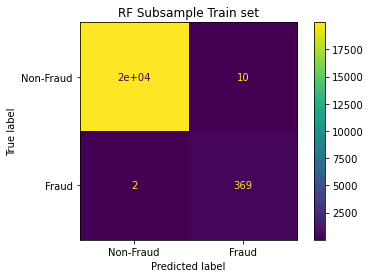

In [123]:
print_model_metrics(clf_rf_grid, X_subsample_train.values,y_subsample_train,"RF Subsample Train set")

Model score accuracy-- 0.8754448398576513
Balanced accuracy-- 0.9970630635030946
average_precision-- 0.7817796610169492
roc_auc_score-- 0.9970630635030946
recall_score-- 0.9946091644204852
f1- 0.8754448398576513
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    213234
       Fraud       0.78      0.99      0.88       371

    accuracy                           1.00    213605
   macro avg       0.89      1.00      0.94    213605
weighted avg       1.00      1.00      1.00    213605

[[213131    103]
 [     2    369]]


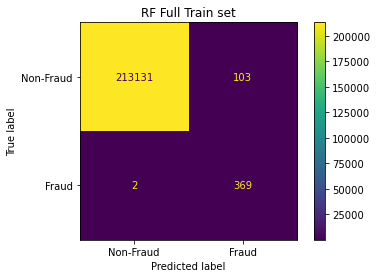

In [125]:
print_model_metrics(clf_rf_grid, X_train.values,y_train,"RF Full Train set")

RF - Before Cross validation - ROC Curve for Train Subsample & Train Full

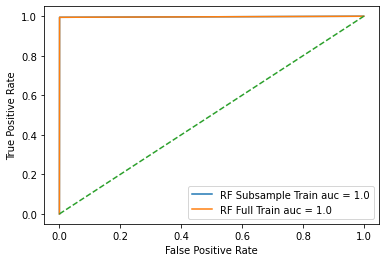

In [196]:
multiple_rocauc_curve_subsample_train(clf_rf_grid, X_subsample_train, y_subsample_train, X_train, y_train,  "RF")
#Both train & subsample have same AUC

RF - Before Cross validation - PR Curve for Train Subsample & Train Full

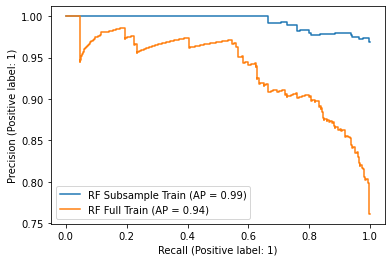

In [197]:
multiple_pr_curve_subsample_train(clf_rf_grid, X_subsample_train, y_subsample_train, X_train, y_train,  "RF")

## 5. Technique 2 (20 marks)<a class="anchor" id="section5"></a>

### a) Discuss your motivation for choosing the technique (MLPClassifier) and  provide a schematic figure of the process<a class="anchor" id="section5.a"></a>

(100-200 words)

**Explanation**

**Chosen technique:** 
- Sklearn’s MLPClassifier (Multilayer perceptron Classifier) (MLP)

**Motivation for choosing MLP:**
- MLP is a supervised learning algorithm used to solve linear & non-linear problems. It works by finding an a non-linear approximate function f(.): R^m  R^o underlaying the dataset where
m is the number of dimensions for input 
O is the number of dimensions for output.
- I wanted to try out one Ensemble technique and 1 non-ensemble non-tree-based technique that works best for the Credit card fraud detection. As I choose RF as the first technique, I wanted to explore how a non-tree-based technique performs on imbalanced dataset & hence choose MLPClassifier Neural network approach. 
- Though the Sklearns MLPClassifier doesn’t provide a great deal of flexibility like Tensor based frameworks (Tensorflow,PyTorch etc.), still the algorithm performs comparatively better than traditional algorithms like Logistic or Clustering techniques. 
- As the features are PCA converted, MLP would be a good choice for the algorithm to decide which features are most are important for classification based on the calculated weights. 

**Working:**
 
- Terms:
      - Input -> X=x1,x2,...,xm , Input features 
      - Target -> Out(y) 
      - Activation function -> a
      - Multiple hidden layers & varying nodes at each layer
- In our Credit card scenario, the network has 2 hidden layers with 100 & 10 neurons. Each neuron has a weight & bias initialized by Scikit-learn.
- Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation w1*x1 +w2*x2+..+wm*xm followed by a non-linear activation function which can be tanh, relu provided by Sklearn.
- The output layer receives the values from the last hidden layer and transforms them into output values. The output is automatically calculated by MLPClassifier based on the target classes in the dataset. 
- During training, the algorithm adjusts the initial weights & bias at each layer such that the input data represents/fits the target by an approximate function. Weights itself are adjusted using backpropagation. Optimization function “Adam” is used for weight adjustments after backpropagation. 
- The algorithm outputs weight coefficients and bias as intercept attributes along with the class probabilities.


**Multi-layer perceptron Model building lifecycle**

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale<a class="anchor" id="section5.b"></a>


**Explanation on MLP's hyper parameters:**

Below are the hyperparameters selected for MLP and the rationale for choosing them.
<br>

- hidden_layer_size – was selected to add more hidden layers in the network to accommodate complex non-linear pattern in the dataset.
- Activation “relu” was selected to add a non-linear function to the data after weight calculation.
- Solver “adam” is a good helped to for faster convergence and hence was chosen during Gridsearch Cross validation.
- Alpha parameter helps to avoid overfitting.
- Batch size – optimal batch size for the dataset was chosen after which a backpropagation happens rather than backpropagation after an epoch
- Learning rate initial – optimal Learning rate was chosen by Gridsearch Cross validation for weight updates.
- Max_iter – the default value of 200 epochs did not lead to convergence, hence increased the epoc iterations to 500
- Verbose is used only for the developer to know the progress at each iteration on number of fittings by the Gridsearch.
- Other default parameters are used with default values.


In [22]:
mlp_grid_params = {
    "hidden_layer_sizes"          : [ [100, 10]],  
    "alpha"  : [0.0001, 0.001], 
    "activation"       : ["relu", "tanh"],
    'solver' : ['adam', 'lbfgs'],
    'batch_size': [64],
    "learning_rate": ['adaptive'],
    "learning_rate_init": [0.001],
    "max_iter": [500]
}

### c) Optimising hyper parameters<a class="anchor" id="section5.c"></a>

- **Grid search** (GridSearchCV) is used for Hyper parameter selection. GridSearchCV exhaustively generates various candidates from a grid of parameter values specified in “param_grid” parameter and the default folds of cross validation is 5 times.
- All the possible combinations of parameter values are evaluated and the best combination is selected that match the scoring metric provided in GridSearchCV .
- The best parameter from the Gridsearch can be known through the attribute grid_mdl.best_params_  
- Due to longer time for computation, Grid search parameters for MLP algorithm is limited to few combinations only after trying out individually. In each of the 5 fold, 8 combinations are fitted (so total 5 * 8 = 40 iterations) 
                    Fitting 5 folds for each of 8 candidates, totalling 40 fits

- With a default cross validation=5, the optimal hyper parameters chosen for MLP are below:


| Hyperparameter | BestValue | Description |
| :- | -: | :-: |
| hidden_layer_size | 100,10 | Number of hidden layers in the network
| activation | relu | Activation function for the hidden layer.In our case, tanh & relu gave almost result.
| solver | adam | The solver parametwer is used for optimizing the weights derived through backpropogation
| alpha | 0.0001 | L2 penalty or the regularization term which helps to avoid overfitting by penalizing weights with large magnitudes. Best value chosen from Gridsearch is 0.0001
| Batch size | 64 | is the batch after which the backpropagation happens 
| learning_rate_init | 0.001 | The initial learning rate used. It controls the step-size in updating the weights.
| early stopping | False | Adjusts the class imbalance while building the decision trees.
| max_iter | 500 | number of epochs, Maximum number of iterations till convergence.
| verbose | 3 | Print the progress messages to stdout
| n_jobs  |-1 | Indicator to the processor to utilise all the CPU's for training to enable parallel processing


- Below code trains a MLP algorithm along with GridSearch for hyper parameter selection with default 5-fold cross validation.
- Best parameters & score are printed for reference

In [23]:
cv=StratifiedKFold(n_splits=5, random_state=98, shuffle=True)
clfmlp=MLPClassifier()

clf_mlp_grid_mdl = GridSearchCV(cv=cv,estimator=clfmlp, param_grid=mlp_grid_params, scoring='f1' ,n_jobs=-1,verbose=4)
clf_mlp_grid_mdl.fit(X_subsample_train, y_subsample_train)
best_scores_mlp_grid = clf_mlp_grid_mdl.best_score_
best_params_mlp_grid = clf_mlp_grid_mdl.best_params_  
print(best_scores_mlp_grid)
print(best_params_mlp_grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8835715363772918
{'activation': 'tanh', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'}


### d) Performance metrics for training<a class="anchor" id="section5.d"></a>

The subsampled train set & full train set is evaluated.
Metrics printed are below:

**MLPClassifier - Evaluation on train set Before Cross validation**  

| Metric | Subsampled_Train_set |  Full_Train_set
| :- | :- | :-: | 
| F1 | 0.88 | 0.77 
| Balanced Accuracy | 0.90  | 0.90  
| Precision | 0.96   | 0.74  
| Recall | 0.81   | 0.81  
| ROC AUC score | 0.91  | 0.90 
| PR Curve | 0.88 | 0.78
| FP | 11/20371  | 101/213234 
| FN | 70/20371  | 70/213234 

Model score accuracy-- 0.8814055636896048
Balanced accuracy-- 0.9053853773584906
average_precision-- 0.9647435897435898
roc_auc_score-- 0.9053853773584906
recall_score-- 0.8113207547169812
f1- 0.8814055636896048
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     20000
       Fraud       0.96      0.81      0.88       371

    accuracy                           1.00     20371
   macro avg       0.98      0.91      0.94     20371
weighted avg       1.00      1.00      1.00     20371

[[19989    11]
 [   70   301]]


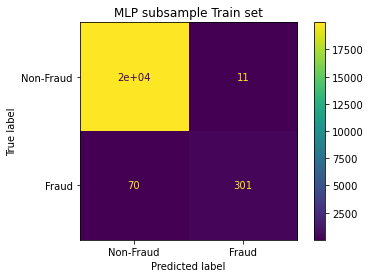

In [127]:
print_model_metrics(clf_mlp_grid_mdl, X_subsample_train.values,y_subsample_train, "MLP subsample Train set")

MLP - Before Cross validation - ROC Curve for Train Subsample & Train Full

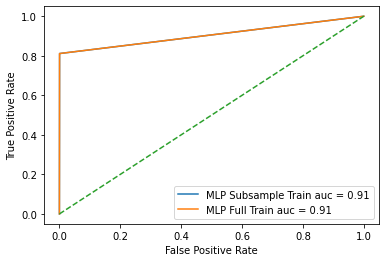

In [198]:
multiple_rocauc_curve_subsample_train(clf_mlp_grid_mdl, X_subsample_train, y_subsample_train, X_train, y_train,  "MLP")
#Both train & subsample have same AUC

MLP - Before Cross validation - PR Curve for Train Subsample & Train Full

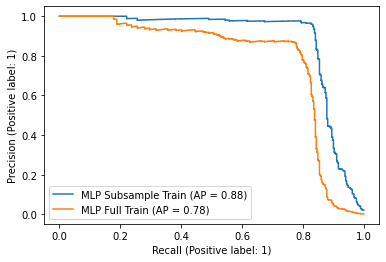

In [199]:
multiple_pr_curve_subsample_train(clf_mlp_grid_mdl, X_subsample_train, y_subsample_train, X_train, y_train,  "MLP")

## 6. Comparison of metrics performance for testing (16 marks)<a class="anchor" id="section6"></a>
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Use of cross validation for both techniques to deal with over-fitting<a class="anchor" id="section6.a"></a>

- **Cross validation** is a testing technique that is useful to balance out the different patterns that might exist in the data. Cross validation helps to reduce over fitting the model on one pattern of data. 
- Train set is partitioned into subsets with equal instances. One subset is reserved for testing & remaining subsets for model training. This is repeated multiple times & the test results are averaged. This reduces the variances in the dataset.
- Below, nested cross validation with hyper parameter selection technique is used. Grid search CV selects the best hyperparameters on various **inner CV**. This model is then finally evaluated using "cross_val_score" method on **outer CV** which repeatedly evaluates the best model multiple times and evaluated score is then averaged.


##  Cross-validation - Technique 1 - Random Forest

#### Random Forest - Apply Inner & Outer Cross Validation

In [60]:
rf_mdl_eval=RandomForestClassifier()
NUM_TRIALS =  10

non_nested_scores = [] # list to store the best scores
non_nested_params = [] # list to store the best hyper parameters in each iteration

nested_scores = []

lst_rf_mdls_cv = [] 
start_time = time.time()
import warnings; warnings.simplefilter('ignore')
shuffle = True 
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops, independently of the dataset.
    rnd = i if shuffle else None
    inner_cv = StratifiedKFold(n_splits=5, shuffle=shuffle, random_state=rnd)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=shuffle, random_state=rnd)

    # Non_nested parameter search and scoring
    # refit should hold the main score that will be used for optimising the hyper parameters
    clf_rf_gridcv_mdl = GridSearchCV(estimator=rf_mdl_eval, param_grid=rf_grid_params, cv=inner_cv, n_jobs=-1,verbose=3,scoring='f1', refit = 'f1')
    non_nested_score = clf_rf_gridcv_mdl.fit(X_subsample_train, y_subsample_train)
    non_nested_scores.append(clf_rf_gridcv_mdl.best_score_)
    non_nested_params.append(clf_rf_gridcv_mdl.best_params_)
    print("Random Forest Best Param ---", clf_rf_gridcv_mdl.best_params_, clf_rf_gridcv_mdl.best_score_) 

    lst_rf_mdls_cv.append(clf_rf_gridcv_mdl)

    # Below best score corresponds with the parameters with maximum average score.    
    # Nested CV with parameter optimisation
    
    nested_score = cross_val_score(clf_rf_gridcv_mdl, X=X_sub, y=y_sub, cv=outer_cv, scoring='f1', n_jobs=-1,verbose=3)
    nested_scores.append( nested_score.mean())
    
    # Below we show the final score of each outer fold after optimising the parameters. nested_score
    # holds the score of the best model on the an outer fold, the best model is obtained via GridSearchCV 
    # on the rest of the outer folds (n-1) where n is the number of folds.
    # we are selecting the model in the inner CV. So, please be mindful that nested CV is for model evaluation only   
    
print('Final Score for a RF Technique = ',np.mean( nested_scores)  )
print("--- Time taken for execution %s seconds ---" % (time.time() - start_time))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 60, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10, 'warm_start': True} 0.9032895066444195


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 76.4min remaining: 114.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 76.5min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'warm_start': True} 0.9027450873350873


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.1min remaining: 24.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.2min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'warm_start': True} 0.9006456678106899


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 15.9min remaining: 23.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.0min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 30, 'warm_start': True} 0.8973236575797428


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.9min remaining: 25.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.0min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'warm_start': True} 0.9035974475382431


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.5min remaining: 24.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.6min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 60, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 20, 'warm_start': True} 0.9013505919137337


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 17.4min remaining: 26.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.4min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'warm_start': True} 0.8976983559253082


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 16.7min remaining: 25.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 16.8min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'warm_start': True} 0.8985406868437746


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 17.2min remaining: 25.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.3min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 30, 'warm_start': True} 0.9050808148735265


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 19.1min remaining: 28.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 19.1min finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Param --- {'class_weight': 'balanced', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 30, 'warm_start': True} 0.898629307080651


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 28.1min remaining: 42.1min


Final Score for a RF Technique =  0.8960473416525575
--- Time taken for execution 17452.462138175964 seconds ---


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 28.1min finished


### Random Forest - Fit the best parameters selected in Cross Validation to build final RF Model

In [31]:
warnings.simplefilter('ignore')
rf_mdl_final1 = RandomForestClassifier(
class_weight= 'balanced_subsample', max_depth= 40, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=20, warm_start= True)
rf_mdl_final1.fit(X_subsample_train, y_subsample_train)


C:\Users\shilp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


RandomForestClassifier(class_weight='balanced_subsample', max_depth=40,
                       max_features='sqrt', min_samples_split=20,
                       warm_start=True)

Model score accuracy-- 0.9996072848657405
Balanced accuracy-- 0.9998
average_precision-- 0.978891820580475
roc_auc_score-- 0.9998
recall_score-- 1.0
f1- 0.9893333333333333
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     20000
       Fraud       0.98      1.00      0.99       371

    accuracy                           1.00     20371
   macro avg       0.99      1.00      0.99     20371
weighted avg       1.00      1.00      1.00     20371

[[19992     8]
 [    0   371]]


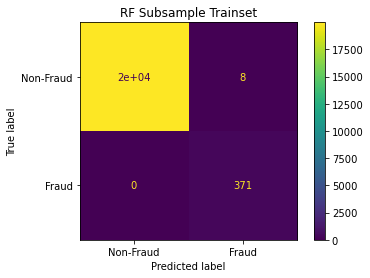

In [131]:
print_model_metrics(rf_mdl_final1,X_subsample_train, y_subsample_train, "RF Subsample Trainset")

Model score accuracy-- 0.9996629292385478
Balanced accuracy-- 0.9998311713891781
average_precision-- 0.837471783295711
roc_auc_score-- 0.9998311713891781
recall_score-- 1.0
f1- 0.9115479115479115
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    213234
       Fraud       0.84      1.00      0.91       371

    accuracy                           1.00    213605
   macro avg       0.92      1.00      0.96    213605
weighted avg       1.00      1.00      1.00    213605

[[213162     72]
 [     0    371]]


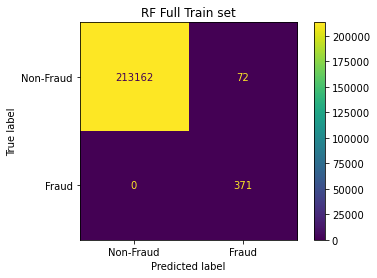

In [141]:
print_model_metrics(rf_mdl_final1,X_train, y_train, "RF Full Train set")

Random Forest - After Cross validation - ROC Curve for Train Subsample & Train Full

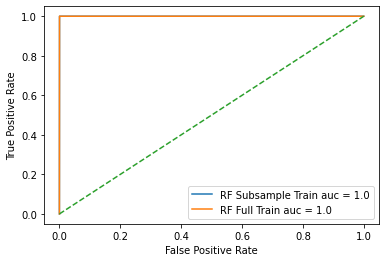

In [200]:
multiple_rocauc_curve_subsample_train(rf_mdl_final1, X_subsample_train, y_subsample_train, X_train, y_train,  "RF")
# Subsample & Train have same AUC

Random Forest - After Cross validation - PR Curve for Train Subsample & Train Full

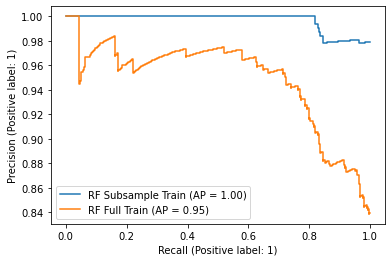

In [201]:
multiple_pr_curve_subsample_train(rf_mdl_final1, X_subsample_train, y_subsample_train, X_train, y_train,  "RF")

## Cross-validation - Technique 2 - MLP Classifier

#### MLP - Apply Inner & Outer Cross Validation

In [60]:
mlp_mdl_eval=MLPClassifier()
NUM_TRIALS = 10

non_nested_scores = [] # list to store the best scores
non_nested_params = [] # list to store the best hyper parameters in each iteration

nested_scores = [] # holds the scores of cross_validation_score

lst_mlp_mdls_cv = [] # holds all the cross validated models & later is saved as pickle file to desktop for future use

import warnings; warnings.simplefilter('ignore')
shuffle = True 
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops, independently of the dataset.
    rnd = i if shuffle else None
    inner_cv = StratifiedKFold(n_splits=4, shuffle=shuffle, random_state=rnd)
    outer_cv = StratifiedKFold(n_splits=4, shuffle=shuffle, random_state=rnd)

    # Non_nested parameter search and scoring
    # refit holds the main score that is used for optimising the hyper parameters
    clf_mlp_grid_mdl = GridSearchCV(estimator=mlp_mdl_eval, param_grid=mlp_grid_params, cv=inner_cv, n_jobs=-1,verbose=3,scoring='f1', refit = 'f1')
    non_nested_score = clf_mlp_grid_mdl.fit(X_subsample_train, y_subsample_train)
    non_nested_scores.append(clf_mlp_grid_mdl.best_score_)
    non_nested_params.append(clf_mlp_grid_mdl.best_params_)
    print("MLP Best Param ---", clf_mlp_grid_mdl.best_params_, clf_mlp_grid_mdl.best_score_) 

    lst_mlp_mdls_cv.append(clf_mlp_grid_mdl)
     
    nested_score = cross_val_score(clf_mlp_grid_mdl, X=X_subsample_train, y=y_subsample_train, cv=outer_cv, scoring='f1', n_jobs=-1,verbose=3)
    nested_scores.append( nested_score.mean())
    
print('Final Score for MLP Technique = ',np.mean(nested_scores))  


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'} 0.8837775366762582


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  6.5min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'relu', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'} 0.8788733504053047


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.8min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'} 0.8803720155773908


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 10.2min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'} 0.8893494269381319


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.5min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'tanh', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'} 0.881930644005288


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.7min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'} 0.8840670759321693


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 10.9min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'} 0.8766925734996173


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 10.8min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'} 0.884564325607992


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 10.0min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'relu', 'alpha': 0.001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'} 0.8876613500808215


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 11.2min finished


Fitting 4 folds for each of 8 candidates, totalling 32 fits
MLP Best Param --- {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': [100, 10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'} 0.8852989207164528


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Final Score for MLP Technique =  0.8749579488972319


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 10.2min finished


### MLP - Fit the best parameters selected in Cross Validation to build final MLP Model

In [73]:
mlp_mdl_final1=MLPClassifier()
mlp_mdl_final1=MLPClassifier( activation = 'relu', alpha= 0.0001, batch_size= 64, hidden_layer_sizes= [100, 10], learning_rate= 'adaptive',learning_rate_init= 0.001, max_iter= 500, solver='adam')
mlp_mdl_final1.fit(X_subsample_train,y_subsample_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=[100, 10],
              learning_rate='adaptive', max_iter=500)

Model score accuracy-- 0.9956310441313632
Balanced accuracy-- 0.8919582884097035
average_precision-- 0.97
roc_auc_score-- 0.8919582884097036
recall_score-- 0.784366576819407
f1- 0.8673621460506706
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     20000
       Fraud       0.97      0.78      0.87       371

    accuracy                           1.00     20371
   macro avg       0.98      0.89      0.93     20371
weighted avg       1.00      1.00      1.00     20371

[[19991     9]
 [   80   291]]


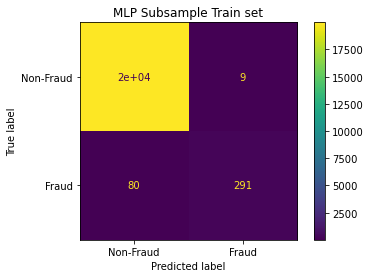

In [160]:
print_model_metrics(mlp_mdl_final1, X_subsample_train,y_subsample_train, "MLP Subsample Train set")

Model score accuracy-- 0.9992415907867325
Balanced accuracy-- 0.8919910113807119
average_precision-- 0.7801608579088471
roc_auc_score-- 0.8919910113807119
recall_score-- 0.784366576819407
f1- 0.782258064516129
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    213234
       Fraud       0.78      0.78      0.78       371

    accuracy                           1.00    213605
   macro avg       0.89      0.89      0.89    213605
weighted avg       1.00      1.00      1.00    213605

[[213152     82]
 [    80    291]]


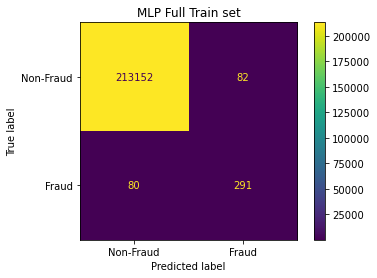

In [163]:
print_model_metrics(mlp_mdl_final1, X_train,y_train, "MLP Full Train set")

MLP - After Cross validation - ROC Curve for Train Subsample & Train Full

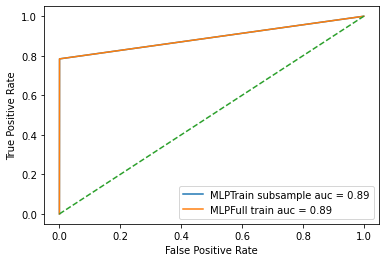

In [184]:
multiple_rocauc_curve_subsample_train(mlp_mdl_final1, X_subsample_train, y_subsample_train, X_train, y_train,  "MLP")
# Both MLP Full Train & Subsample Train have same AUC 

MLP - After Cross validation - PR Curve for Train Subsample & Train Full

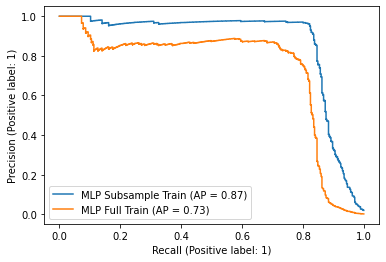

In [182]:
multiple_pr_curve_subsample_train(mlp_mdl_final1, X_subsample_train, y_subsample_train, X_train, y_train,  "MLP")

### b) Comparison with appropriate metrics for testing<a class="anchor" id="section6.b"></a>

**General definitions needed for evaluation interpretation:**
- As per the business requirement, the cost of predicting a FalseNegative costs much higher to bank than FalsePositive. 1 FalseNegative costs 10K whereas 1 FalsePositive costs 1K. As the Fraud cases are much lower, when scoring the model, F1 metric is used which balances the score between FalsePositive & FalseNegatives.
- Area under ROC curve plots Sensitivity vs (1-Specificity). Sensitivity is the proportion of the positive class being correctly classified, Specificity is the proportion of the negative class being correctly classified
- Area under ROC curve -ROC is a probability curve. AUC represents the degree or measure of separability i.e. it tells how much the model is capable of distinguishing between classes. If AUC is higher, the model is better at predicting 0 classes as 0 and 1 classes as 1.
- The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision. High precision means low false positive rate, high recall means low false negative rate.

**Interpretation of Test Set evaluation metircs:**
- With Recall as the scoring metric, I received too high FalsePositives. F1 scoring helped to maintain a balance between the 2 misclassifications.
- With respect to results, on evaluating Random Forest on Test set(~71K records) resulted in lower FalsePositive than MLPClassifier where as FlaseNegative is slightly lower for MLPClassfier by 3 which does not matter as much as FalseNegative which is 5 times higher than RandomForest. Hence, we have a bit higher Recall for RandomForest than MLP & Precision is a but higher for MLP than RF.


**Interpretation:**
In all the evaluations, i.e. Train & Test before & after cross validation, Random Forest has high F1 & recall score than MLP.

**Train set Evaluation of 2 models before Cross validation (Results from section 4.d & 5.d)**  

| Metric | RF Score |  MLP Score
| :- | :- |  :-: | 
| F1 |  0.87 | 0.77 
| Balanced Accuracy | 0.9970  | 0.90
| Precision  | 0.7817 | 0.74 
| Recall   | 0.9946  |0.81  
| ROC AUC score    | 1|0.90 
| PR Curve  |  0.94 |0.78 
| FP | 103/213605|101/213605 
| FN | 2/213605|70/213605 


**Train set Evaluation of 2 models after Cross Validation (Results from section 6.a)** 

| Metric | RF Score | MLP Score  
| :- |:- | :-: |  
| F1 | 0.911547  | 0.7822
| Balanced Accuracy | 0.9998 |0.8919   
| Precision | 0.83747  | 0.7801
| Recall | 1  |0.7843  
| ROC AUC score | 0.9998 | 0.8919
| PR Curve | 0.95| 0.73
| FP | 72/213605  | 82/213605 
| FN | 0/213605 | 80/213605 


**Test set Evaluation of 2 models after Cross Validation (Results from this section 6.b)**  

| Metric | RF Score | MLP Score  
| :- |:- | :-: |  
| F1 | 0.8207  | 0.8148 
| Balanced Accuracy | 0.9254 |0.9089     
| Precision | 0.7923  | 0.8114 
| Recall | 0.8512  | 0.8181  
| ROC AUC score | 0.9254 | 0.9089
| PR Curve | 0.87| 0.78
| FP | 27/71202  | 23/71202 
| FN | 18/71202 | 22/71202 

Model score accuracy-- 0.9993679952810315
Balanced accuracy-- 0.9254299105397277
average_precision-- 0.7923076923076923
roc_auc_score-- 0.9254299105397277
recall_score-- 0.8512396694214877
f1- 0.8207171314741036
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     71081
       Fraud       0.79      0.85      0.82       121

    accuracy                           1.00     71202
   macro avg       0.90      0.93      0.91     71202
weighted avg       1.00      1.00      1.00     71202

[[71054    27]
 [   18   103]]


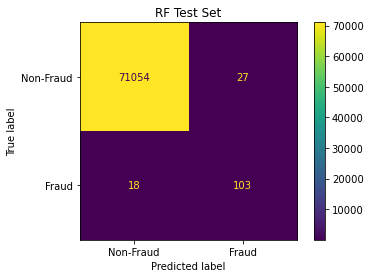

In [137]:
print_model_metrics(rf_mdl_final1,X_test, y_test, "RF Test Set")

Model score accuracy-- 0.9993679952810315
Balanced accuracy-- 0.9089291218341176
average_precision-- 0.8114754098360656
roc_auc_score-- 0.9089291218341176
recall_score-- 0.8181818181818182
f1- 0.8148148148148149
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     71081
       Fraud       0.81      0.82      0.81       121

    accuracy                           1.00     71202
   macro avg       0.91      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202

[[71058    23]
 [   22    99]]


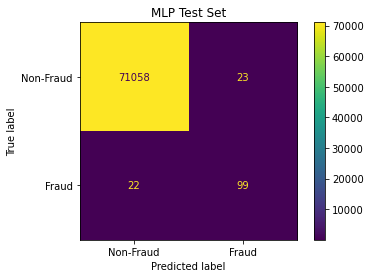

In [138]:
print_model_metrics(mlp_mdl_final1,X_test, y_test, "MLP Test Set")

Comparision of 2 models - Test evaluation metrics

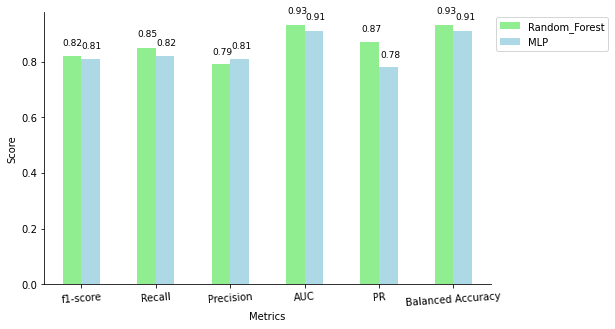

In [328]:
compare_metrics(rf_mdl_final1,mlp_mdl_final1,X_test, y_test)

### c) Model selection (ROC or other charts)<a class="anchor" id="section6.c"></a>

Model is selection is the process of selecting the best model for the problem at hand, from among several other possible models of similar prediction powers. So, to evaluate between Random Forest & MLP Classifier, we use below Metrics.

**Interpretation of model curves - Conclusion based on Test dataset evaluation**

- As per the business requirement, the cost of predicting a FalseNegative costs much higher to bank than FalsePositive. 1 FalseNegative costs 10K whereas 1 FalsePositive costs 1K. As the Fraud cases are much lower, when scoring the model, F1 metric is used which balances the score between FalsePositive & FalseNegatives.

- RF gives much lesser FalseNegative (higher recall score) which means much closer to bank requirements satisfaction than MLP.

- Area under ROC Curve & PR curve show better results for RF. RF has Area under ROC  curve as 0.93 &  PR curve as 0.87 which is quite good for a model with highly imbalanced classes. 

- So, Random Forest performed better than MLP overall by reducing the FalseNegative misclassifications & RF can be considered the best model out of the two models.


Below code - Comparision - After Cross validation - ROC Curve for RF & MLP models

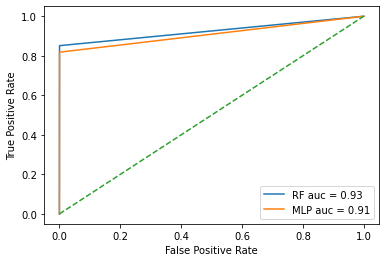

In [147]:
multiple_rocauc_curve(rf_mdl_final1, mlp_mdl_final1, X_test.values,y_test)

Below code - Comparision - After Cross validation - PR Curve for RF & MLP models

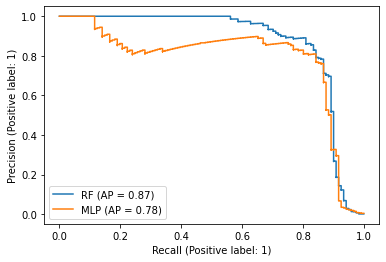

In [152]:
multiple_pr_curve(rf_mdl_final1, mlp_mdl_final1, X_test.values,y_test)

## 7. Final recommendation of best model (8 marks)<a class="anchor" id="section7"></a>

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency<a class="anchor" id="section7.a"></a>

100-200 words

**Overfitting:**  
- The best model Random Forest overfits the train dataset as it predicts all the Fraud cases correctly & has a small number of False Positives. Whereas the model has both False Positive & False Negative on Test set. Overfitting could have been managed by doing extensive Grid search. But due to large computing resource Hyper parameter combinations were configured to be minimal. 

**Complexity:**  
- Translating the business requirement to Test set budget, the model is allowed to make 1 FalsePositive & 0 FalseNegative prediction.This is practically an impossible target to be met using any predictive model. The aim of any Machine learning model is to generalise on the training data and not to over fit the training data. A perfect model on train set means overfitting. And such overfitted model, cannot make better predictions on unseen data.
- Requirement of allowed FalsePositive as 1 per Testset means the model must score a Precision of 99.99963% & Recall as 1 which is again unrealistic for any Machine learning model given the huge imbalance in classes. 
- The Machine learning models comes with lot of statistical assumptions & known uncertainty & building an overly complex model with advanced techniques can only result in poor predictions on unseen data. Hence, only solution is to build a model to minimize the False Positives, than with a aim of having a perfectly predictive model.

**Efficiency:**   
- Efficiency in terms of how well model performs on unseen dataset – As the aim was to reduce fall negatives which is a type 2 error, the recall score that our model gave of 0.93 can be considered a good model. Future scope could be to reduce the recall further by increasing the FalsePositives as FP costs less than FN.
- The domain knowledge of the data is important before modelling. As the dataset had 29 features that were Principal components converted by PCA, we applied the model assuming the features were all most important. If the variance explained by each PCA was known, we could have only considered first few components that could have led to a less complex model and better efficiency in reuslts.
- The model did relatively well on a subset of train set considered for training. Provided better computational resources, model can be trained on larger hyper parameters & larger dataset, resulting in better results.




### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective<a class="anchor" id="section7.b"></a>

100-200 words

**Result Interpretation:**

**Check if the best model(Random Forest) meets the business requirement 1 & 2 with respect to budget**

Two main requirement from bank from tecnical perspective:
<br>

**1.**	Allowed FalsePositive is £20k for each £100m of actual Non-Fraudulent transactions (True Negative), costs bank 1K per FalsePositive.
<br>

**2.**	Allowed FalseNegative is £50k for each £200k of actual Fraudulent transactions (True Positive), costs bank 10K per FalseNegative.
<br>

- The budget for FalsePositive in our test set is 1.26K where as our model predicted 27 False positive which costs 27K to the bank (1K per FP)
        budget fp -  1.2660215840000002 ,predicted_fp_cost - 27K

- The budget for FalseNegative in our test set is 3.46K where as our model predicted 18 False Negative which costs 180K to the bank (10K per FN)
        budget fn -  3.46399 ,predicted_fn_cost - 180K
        
- As per the bank requirement, minimizing Type 2 error(FN) is more critical than Type 1 error(FP)

- From the results, it is seen that the model has crossed the budget allocated as per both the requirements. As per requirement there should be maximum 1 False Positive and 0 False Negative. But out model predicts 27 False Positive & 18 False Negative.

- Comparitively, Random Forest is closer to the bank requirement than MLP model as Random Forest has lesser FalseNegative & hence lesser cost of mis-classification than MLP model.

**Relevance with technical perspective:**
 
- Relevance from business perspective means the capacity of the model to determine a Fraud case as True positive & Non-Fraud case as False Negative.  In technical terms it referes to Sensitivity(True Positive Rate) & Specificity(True Negative Rate) .

- The best model Random Forest has predicted 27 FP & 18 FN cases. The relavence is visualized in ROC Curve which gives the area under the curve value of 0.93. Area under curve value closer to 1 means that the model is able to predict the actual classes correctly. 

**Balance with technical perspective:**

- F1 score was used throughout for model evaluation to maintain a balance between recall & precision ie FN & FP check during model building. Ideally we could have used "Recall" to reduce FalseNegatives, but as the dataset is imbalanced with Fraud cases being minority, using F1 metric seemed a logical option than "Recall" or "Precision".  
        Recall = TP / (TP+FN)  
        Precision = TP / (TP+FP)  
- The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision. High precision means low false positive rate, high recall means low false negative rate. Random Forest showed a PR curve score as 0.87 which is comparitively better than score of 0.78 by MLP. 


Below code calculates the Budget allowed for misclassification in our Test set & how much our model predicted & how much the model mis-prediction costed to the bank

In [159]:
# Logic to calulate the Total amount for Fraud & Non-Fraud records from Unscaled Test dataset
df_merged_unscaled = pd.concat([df_original_xtest, df_original_ytest], axis=1)
df_amount = df_merged_unscaled[["Amount","Class"]] #df_new_xtest
type(df_amount)
fraud = df_amount[df_amount["Class"]==1]
nf= df_amount[df_amount["Class"] ==0]

test_fraud_total_amt_k = fraud["Amount"].sum() # original test fraud total amount in pounds
test_nf_total_amt_k = nf["Amount"].sum()       # original test non-fraud total amount in pounds

test_fraud_total_amt_pounds = test_fraud_total_amt_k/1000 # convert Fraud amount from thousands to pounds
test_nf_total_amt_pounds = test_nf_total_amt_k/1000  # convert Non-Fraud amount from thousands to pounds
print("Fraud total amount in Test dataset: " , test_fraud_total_amt_pounds)
print("NF total amount in Test dataset: " ,test_nf_total_amt_pounds)

budget_allowed_fp= (20*test_nf_total_amt_pounds)/100000 # allowed FP budget 
budget_allowed_fn= (50*test_fraud_total_amt_pounds)/200 # allowed FN budget 

predicted_fp = 27 # FalsePositive predicted by the Random Forest best model
predicted_fn = 18 # FalseNegative predicted by the Random Forest best model
predicted_fp_cost = predicted_fp * 1  # calculate cost of FP missclassification, 1K per wrong prediction
predicted_fn_cost = predicted_fn * 10  # calculate cost of FN missclassification, 10K per wrong prediction

print( "budget fp - " , budget_allowed_fp, ",predicted_fp_cost -",predicted_fp_cost )
print( "budget fn - " , budget_allowed_fn, ",predicted_fn_cost -",predicted_fn_cost )


Fraud total amount in Test dataset:  13.85596
NF total amount in Test dataset:  6330.10792
budget fp -  1.2660215840000002 ,predicted_fp_cost - 27
budget fn -  3.46399 ,predicted_fn_cost - 180


## 8. Conclusion (8 marks)<a class="anchor" id="section8"></a>

### a) What has been successfully accomplished and what has not been successful?<a class="anchor" id="section8.a"></a>
100-300 words


**Technical accomplishments:**
- I have been able to get Recall & precision balance keeping FalseNegatives to <20 for test sample size of ~71K without using any upsampling technique. I used a subsample from train set to train the model. If the sample taken from train set is a fair representation of the population, then subsampling works as good as up-sampling. There is a further scope of improvisation in FalseNegative by increasing the FalsePositives(as cost of FP is way lesser than cost of FN) by extensive Grid search.
- I have used “Class Weight” parameter in the Random Forest algorithm randomly samples balanced sample when building decision trees. This was a simple alternative to upsampling. I even tried with various weight ratios as input to class weight. This gave similar results to setting the class weight as “balanced” or “balanced subsample”. Hence, I choose “balanced subsample” as the class weight.
- Though limited hyper parameters were tried in Gridsearch and with just 10 iterations of cross validations, the best hyperparameters selected gave good results. With higher computing facility, much larger Grid search combinations can be tried that could lead to better Recall/Precision rates.
- Though Mult-layer perceptron did not provide much network layer optimization features, with the basic configurations, Mult-layer perceptron performed better than other classification or clustering techniques. 
<br>    

**Not successful scenarios:**
- The business requirement which sets very stringent budget on miss-classifications were not met on Test set. But the False Negative was 18 which can be further reduced with model optimization.

- However, the ask in the requirement is impossible to be met by any Machine Learning model. Aim of Machine learning model is to generalize and not to have a perfect prediction on a single dataset. That being said, FalseNegatives can be minimized further with optimal hyper parameter selection & sampling techniques.


### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?<a class="anchor" id="section8.b"></a>

100-300 words

- I could have explored much larger combination of Hyperparameters using GridSearch for current algorithms with better hardware availability (using Google Colab multiple CPUs).
- I could have enhanced Random Forest with AdaBoost which works on top of base classifier like Random Forest & performs better than Random Forest because it is involves Boosting technique.
- I tried Clustering & anomaly detection algorithm during initial algorithm selection phase did not work well with basic configuration. I could have explored further if the clustering algorithm could have worked better with transformation of data.
- Try PyTorch or Keras Neural Network than Sklearn's Multilayer Perceptron because MLP does not allow to fine tune the network with different activation function & other fine grained network control features that PyTorch or Keras provides.


### c) Provide a wish list of future work that you would like to do<a class="anchor" id="section8.c"></a>

100-200 words

- Explore much larger combination of Hyperparameters using GridSearch for current algorithms with better hardware availability (using Google Colab multiple CPUs).
- Enhance the bagging technique with boosting by using algorithms like AdaBoost that builds weighted trees on top of base classifiers. Both techniques combined results in better evaluation results on unseen dataset.
- Try Neural Network frameworks like PyTorch that supports GPU for faster computation on large dataset. Research papers show that T-SNE with autoencoders in Neural Network provide better recall and precision than Scikit-learn algorithms.
- Try temporal modelling("Time" feature) and how time factor influences prediction.